<div class="info">
<b>PROBLEM SHEET 9:</b>    Object Orientated Programming, the Class sructure.

### Standard Header
As we will be utilizing a number of packages with reasonably long names, we will adopt the _de facto_ standard module abbreviations in the following header.  We also ensure that our [division behavior is sensible](http://www.python.org/dev/peps/pep-0238/) by importing from `__future__`:  _i.e._, promotion to `double` will occur from `int` or `long` data types involving division:  `1/2 == 0.5`.  Although this is the default in Python 3, it is a trivial way to help this notebook work in Python 2 if that's what you are using.

In [2]:
%matplotlib widget 
#this allows interactive view but you need to be in classic rather than CoCalc Jupyter notebook for this to work
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
# Let printing work the same in Python 2 and 3
from __future__ import division,print_function
# notice two underscores _ either side of future

SyntaxError: from __future__ imports must occur at the beginning of the file (<ipython-input-2-0dc939fe59a1>, line 10)

So far your programs will have been designed around *functions* or *blocks of statements* which manipulate data. This is called the procedure-oriented way of programming. There is another way of organizing your program which is to combine data and functionality and wrap it inside a *class*. This is called the **object oriented** programming paradigm. Most of the time (as in the case for all of the exercises so far) you can use procedural programming but sometimes when you want to write large programs or have a solution that is better suited to it, you can use object oriented programming techniques.

## PS9 Ex1: (Marks 3/10)

A fluid that flows through a (very long) pipe has zero velocity on the pipe wall and a maximum velocity along the centerline of the pipe. The velocity $v$ varies through the pipe cross section according to the following formula:

$$\upsilon(r)=\left(\frac{\beta}{2\mu_{0}}\right)^{1/n}\frac{n}{n+1}\left(R^{1+1/n}-r^{1+1/n}\right)$$

1. where $R$ is the radius of the pipe,
2. $\beta$ is the pressure gradient (the force that drives the flow through the pipe),
3. $\mu_{0}$ is a viscosity coefficient,
4. $n$ is a real number reflecting the viscous properties of the fluid (n = 1 for water and air, n $<$ 1 for many modern plastic materials),
5. $r$ is a radial coordinate that measures the distance from the centerline ($r$ = 0 is the centerline, $r = R$ is the pipe wall).

* Define a class *VelocityProfile*
* Within the class define a *method* (function inside a class) to plot $v$ versus $r$.
* Within the class define a *method* to return the data (variables) of the current instance of the class.
* Use a call to the class to plot $v$ versus $r$ (for the parameters ($R$=1, $\beta$=0.06, $\mu_{0}$=0.02, $n$=0.1), and again for a new *instance* with ($R$=2, $\beta$=0.03, $\mu_0$=0.02, $n$=0.1). Include the variables in the title of the graphs.


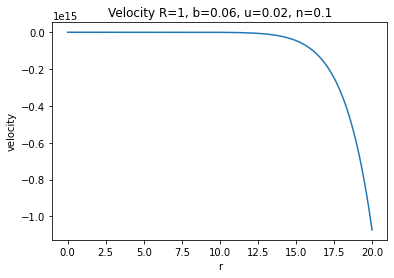

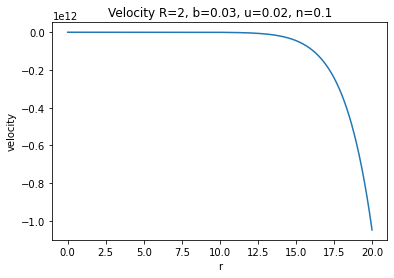

{'R': 1, 'b': 0.06, 'u': 0.02, 'n': 0.1}


In [4]:
#PS9 Ex1:
import numpy as np
import matplotlib.pyplot as plt

class VelocityProfile:
    """
    Descibes the velocity of fluid flow through a pipe
    
    VelocityProfile.plot(r) returns a flow plot against the given x array 'r'
    VelocityProfile.data() will return the system attributes
    """
    def __init__(self, **kwargs):
        ## Data validation: were we passed the variables we need
        try:
            if 'R' and 'b' and 'u' and 'n' not in kwargs:
                ## Raise an error
                raise ValueError("Format is incorrect.")
        except ValueError:
            print("Please provide all the required values 'R', 'b', 'u', 'n'")
        else:
            ## For each of the kwargs given, assign self attributes
            for key in kwargs:
                setattr(self, key, kwargs[key])
                
    def plot(self, r):
        v = np.vectorize(lambda r : (self.b/(2*self.u))**(1/self.n)*(self.n/(1+self.n))*( self.R**(1+(1/self.n)) - r**(1+(1/self.n)) ) )
        fig = plt.figure()
        axe = fig.add_subplot(111)
        axe.set_title(f"Velocity R={self.R}, b={self.b}, u={self.u}, n={self.n}")
        axe.plot(r, v(r))
        axe.set_xlabel("r")
        axe.set_ylabel("velocity")
        plt.draw()
        plt.show()
        return 0
    
    def data(self):
        rtn = {}
        for i in ['R', 'b', 'u', 'n']:
            rtn[i] = getattr(self,i)
        return rtn
    
system1 = VelocityProfile(R=1, b=0.06, u=0.02, n=0.1)
system2 = VelocityProfile(R=2, b=0.03, u=0.02, n=0.1)
r = np.arange(0., 20, 0.001)
system1.plot(r)
system2.plot(r)

print(system1.data())

## PS9 Ex2: (Marks 3/10)

The following code, *class* <font color=blue>*Gravity*</font> is an example of a class that contains methods to calulate gravitational force between two objects ($m,M$) and can generate a plot to visualize the force as a function of the separation $r$.

Since the electric force has a similar functional form to the gravitational force, implement the electric force as a **subclass of Gravity**. *(The implementation just needs to redefine the value of G)*

* Make a *class* for the electric force between two charges $q1$ and $q2$, being a distance $r$ apart in a medium with permittivity $\epsilon_0$.
Where the force, $F=Gq_{1}q_{2}/r^{2}$, where $G = 1/4\pi\epsilon_{0}$. We use the approximate value $G = 8.99~\rm{x}~10^{9} \rm{Nm}^{2}/\rm{C}^{2}$ ($C$ is the Coulomb unit used to measure electric charges such as $q1$ and $q2$). 
* Call the inherited *force(r)* method to compute the electric force and the *visualize* method to make a plot of the force. (You may need to modify the parent class Gravity to make it more generic for the plot title).

force: 1.9819803045897172e+20


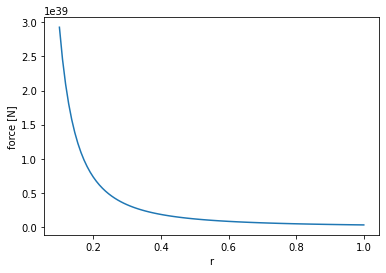

In [5]:
import matplotlib.pyplot as plt
import numpy as np

class Gravity:
    """Gravity force between two physical objects."""
    def __init__(self, m, M):
        self.m = m # mass of object 1
        self.M = M # mass of object 2
        self.G = 6.67428E-11 # gravity constant, m**3/kg/s**2
    def force(self, r):
        G, m, M = self.G, self.m, self.M
        return G*m*M/r**2
    def visualize(self, r_start, r_stop, n=100):
        r = np.linspace(r_start, r_stop, n)
        g = self.force(r)
        plt.figure()
        plt.plot(r, g)
        plt.set_title='Gravity force: m=%g, M=%g' % (self.m, self.M)
        plt.xlabel('r')
        plt.ylabel('force [N]')
        plt.show()


# Un-Comment out some example calls to the class
mass_moon = 7.35E+22
mass_earth = 5.97E+24
g1 = Gravity(mass_moon, mass_earth)
r = 3.844E+8 # Earth-Moon distance in meters
print ('force:', g1.force(r))
z=g1.visualize(0.1,1)

In [ ]:
# Creates an instance g1
g1 = Gravity(mass_moon, mass_earth)
print(dir(g1)) # returns list of methods that act on g1

In [ ]:
g1.visualize(0.1,1) # using the method visulaize on g1


Force between two charges 1C at 2m = 2247500000.0 N


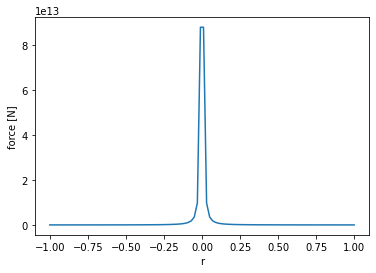

In [18]:
#PS9 Ex2:

class Electric(Gravity):
    def __init__(self, m, M):
        Gravity.__init__(self, m, M)
        self.G = 8.99E9

ele = Electric(1, 1)

print(f"Force between two charges 1C at 2m = {ele.force(2)} N")

ele.visualize(-1, 1)
    

## PS9 Ex3: (Marks 4/10)

* The code *Exercise 3: Drumhead example* generates the vibrational modes on a circular membrane using the *Bessel* functions

* Using *ipywidgets* modify the code so that the parameters n and k are radio buttons (with $n$= 0,1,2,3,4,5 and $k$=1,2,3,4) and have $t$ as a slider.

* **Extra credit**, re-write as a *class*, following on from the example *class example of plotting using ipywidgets* below.

In [ ]:
#PS9 Ex3:

In [19]:
from scipy.special import jn, jn_zeros
#print(help(jn))
#print(help(jn_zeros))

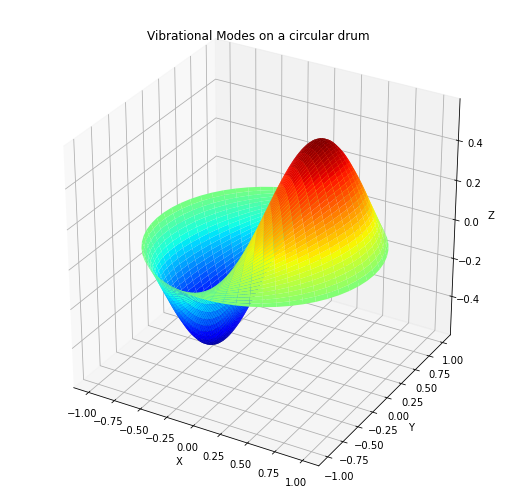

In [3]:
# Exercise 3: Drumhead example
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
#I dont use these here but they for getting the user to input things/warning messages

from scipy.special import jn, jn_zeros

def drumhead_height(n, k, distance, angle, t):
    nth_zero = jn_zeros(n, k)[-1]
    AA=(jn(n, distance*nth_zero))
    BB=np.cos(t)*np.cos(angle*n)
    ZZ=BB*AA
    return ZZ
    
def calcPattern(n,k,t):
    radius = np.linspace(0,1,60)
    theta = np.linspace(0,2.*np.pi,60)
    x = np.array([r*np.cos(theta) for r in radius])
    y = np.array([r*np.sin(theta) for r in radius])
    z = np.array([drumhead_height(n,k, r, theta, t) for r in radius])#get the pixels we want to plot
    fig=plt.figure(figsize=(9,9))
    ax=fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.jet)#in this example we are plotting a surface plot,
    #ax.title("Vibrational modes on a circular drum")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title('Vibrational Modes on a circular drum')
    plt.show()
    
   

calcPattern(1,1,0)




Sines(children=(VBox(children=(IntSlider(value=1, description='freq', max=10), ColorPicker(value='#FF00DD', de…

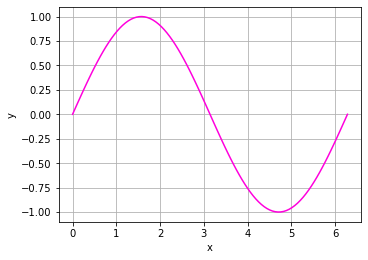

In [5]:
# Class example of plotting using ipywidgets
import ipywidgets as widgets
def make_box_layout():
     return widgets.Layout(
        border='solid 1px black',
        margin='0px 10px 10px 0px',
        padding='5px 5px 5px 5px'
     )
 
class Sines(widgets.HBox):
     
    def __init__(self):
        super().__init__()
        output = widgets.Output()
 
        self.x = np.linspace(0, 2 * np.pi, 100)
        initial_color = '#FF00DD'
 
        with output:
            self.fig, self.ax = plt.subplots(constrained_layout=True, figsize=(5, 3.5))
        self.line, = self.ax.plot(self.x, np.sin(self.x), initial_color)
         
        self.fig.canvas.toolbar_position = 'bottom'
        self.ax.grid(True)
 
        # define widgets
        int_slider = widgets.IntSlider(
            value=1, 
            min=0, 
            max=10, 
            step=1, 
            description='freq'
        )
        color_picker = widgets.ColorPicker(
            value=initial_color, 
            description='pick a color'
        )
        text_xlabel = widgets.Text(
            value='', 
            description='xlabel', 
            continuous_update=False
        )
        text_ylabel = widgets.Text(
            value='', 
            description='ylabel', 
            continuous_update=False
        )
 
        controls = widgets.VBox([
            int_slider, 
            color_picker, 
            text_xlabel, 
            text_ylabel
        ])
        controls.layout = make_box_layout()
         
        out_box = widgets.Box([output])
        output.layout = make_box_layout()
 
        # observe stuff
        int_slider.observe(self.update, 'value')
        color_picker.observe(self.line_color, 'value')
        text_xlabel.observe(self.update_xlabel, 'value')
        text_ylabel.observe(self.update_ylabel, 'value')
         
        text_xlabel.value = 'x'
        text_ylabel.value = 'y'
         
 
        # add to children
        self.children = [controls, output]
     
    def update(self, change):
        """Draw line in plot"""
        self.line.set_ydata(np.sin(change.new * self.x))
        self.fig.canvas.draw()
 
    def line_color(self, change):
        self.line.set_color(change.new)
 
    def update_xlabel(self, change):
        self.ax.set_xlabel(change.new)
 
    def update_ylabel(self, change):
        self.ax.set_ylabel(change.new)
         
         
Sines()

In [ ]:
#ignore this, it's something that helps styling the notebook.
from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()